**“Comparing the Performance of Machine Learning Algorithms in Predicting Customer Churn"**

Bank customer churn (pengunduran diri pelanggan bank) adalah kejadian ketika pelanggan meninggalkan sebuah bank dengan tidak memperpanjang jasa keuangan mereka. Churn dapat terjadi ketika pelanggan merasa tidak puas dengan pelayanan bank, menemukan penawaran yang lebih baik di bank lain, atau memutuskan untuk mengakhiri hubungan keuangan mereka dengan bank.

Dataset churn bank biasanya berisi informasi tentang pelanggan seperti riwayat transaksi, informasi demografis, produk keuangan yang dimiliki, dan apakah mereka sudah keluar dari bank atau masih menjadi pelanggan.

Tujuan dari analisis churn bank adalah untuk memprediksi apakah seorang pelanggan akan tetap menjadi pelanggan bank atau akan keluar, berdasarkan informasi yang tersedia. Dalam konteks model klasifikasi, tujuannya adalah untuk mengembangkan model yang dapat memprediksi apakah seorang pelanggan akan keluar dari bank atau tidak, dengan akurasi yang tinggi.

#Import Library

In [80]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
import plotly.express as px

import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import spearmanr
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report,confusion_matrix
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

#Data Understanding

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/dentawina/Dataset/main/churn_bank.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
df.shape

(10000, 12)

Dataset ini memiliki 10.000 Baris dan 12 Kolom

In [84]:
df.drop('customer_id',axis = 1,inplace = True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [86]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [87]:
df.isnull().sum().sort_values(ascending = False)

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [88]:
df.duplicated().sum()

0

#MapData

In [89]:
df1=df.copy()

In [90]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [91]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

#EDA

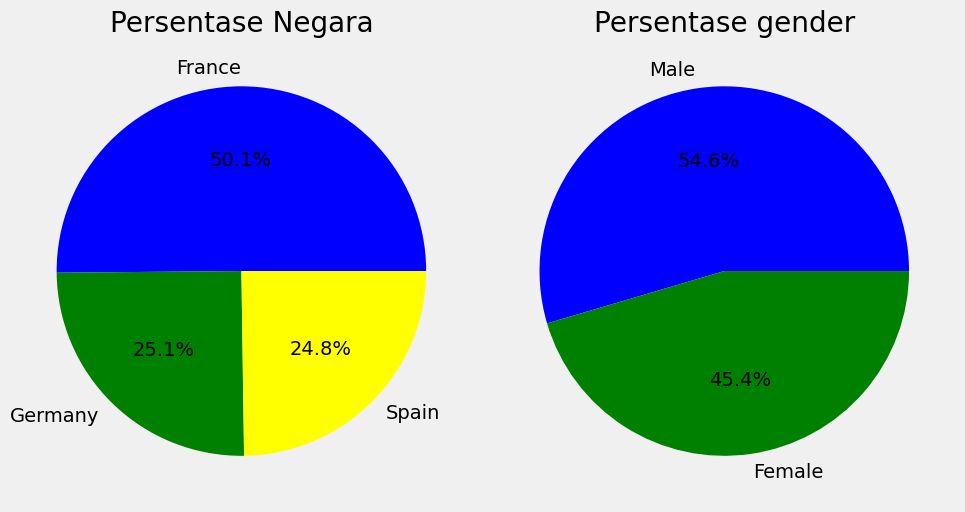

In [92]:
# Plotting four pie charts in one figure using subplots
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs = axs.flatten()

# Pie chart 1: clock_speed_category
percent_country = df1['country'].value_counts(normalize=True) * 100
colors = ['blue','green', 'yellow']
axs[0].pie(percent_country.values, labels=['France', 'Germany', 'Spain'],colors=colors, autopct='%1.1f%%')
axs[0].set_title('Persentase Negara')

# Pie chart 2: int_memory_category
percent_gender = df1['gender'].value_counts(normalize=True) * 100
colors = ['blue','green']
axs[1].pie(percent_gender.values, labels=['Male', 'Female'],colors=colors, autopct='%1.1f%%')
axs[1].set_title('Persentase gender')

# Show the plot
plt.tight_layout()
plt.show()


1. Dapat diketahui bahwa mayoritas pelanggan berasal dari negara Prancis dengan persentase 50.1%, diikuti oleh Jerman dengan 25.1% dan Spanyol dengan 24.8%. Hal ini mungkin disebabkan oleh populasi yang lebih besar dari negara Prancis dibandingkan dengan negara Jerman dan Spanyol.

2. Selain itu, dari segi gender, laki-laki didominasi dengan persentase 54.6% dan wanita dengan 45.4%. Namun, tidak dapat diasumsikan bahwa produk dan layanan yang ditawarkan lebih disukai oleh pelanggan laki-laki, karena faktor lain seperti preferensi pribadi, kebutuhan, dan pengaruh budaya juga dapat memengaruhi pilihan pelanggan.

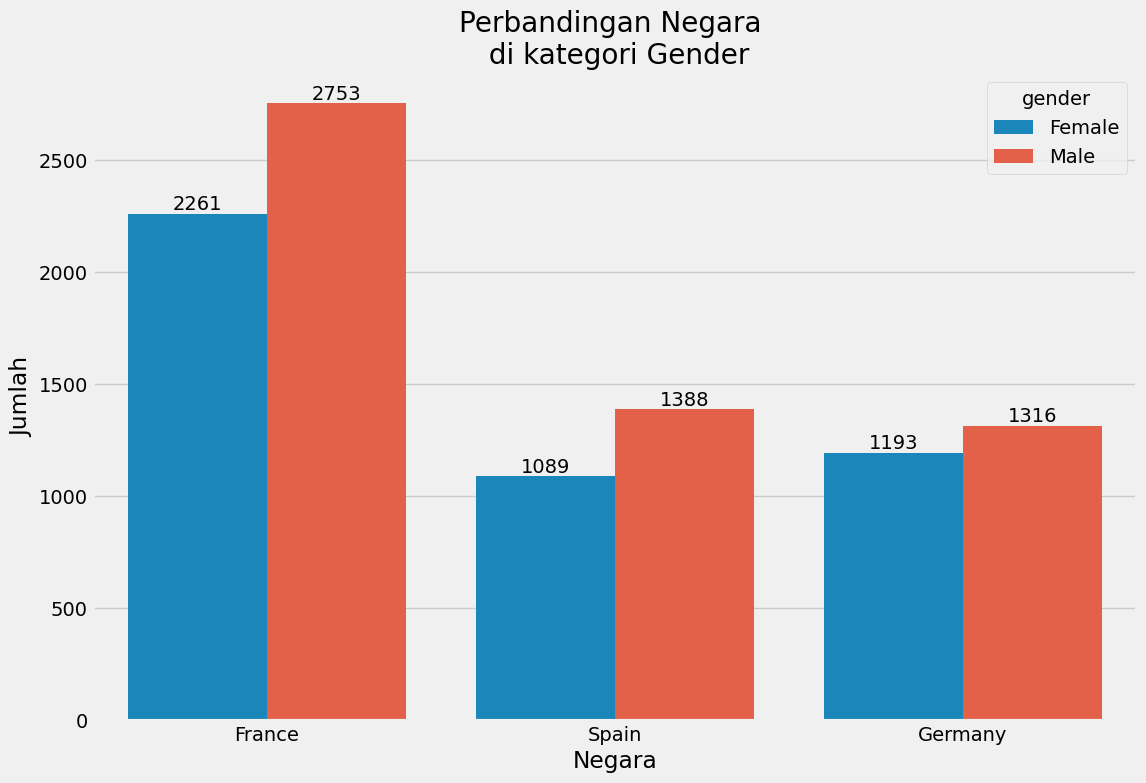

In [93]:
fig, ax = plt.subplots(figsize = (12,8))
_ = sns.countplot(data = df1, x = 'country', hue = 'gender')
_ = ax.set_ylabel('Jumlah')
_ = ax.set_xlabel('Negara')
_ = ax.set_title('Perbandingan Negara \n di kategori Gender')
for i in ax.containers:
    ax.bar_label(i)

1. Mayoritas nasabah berasal dari tiga negara yaitu Prancis, Spanyol, dan Jerman. Selain itu, dari hasil EDA juga didapati bahwa mayoritas nasabah dari ketiga negara tersebut adalah laki-laki. Asumsi yang bisa diambil adalah mungkin terdapat perbedaan budaya atau preferensi di antara negara-negara tersebut dalam hal pengelolaan keuangan dan perbankan. Selain itu, bisa juga disebabkan oleh faktor lain seperti perbedaan dalam industri yang mendominasi di setiap negara atau perbedaan tingkat penghasilan antara gender yang membuat laki-laki lebih cenderung menggunakan jasa perbankan.

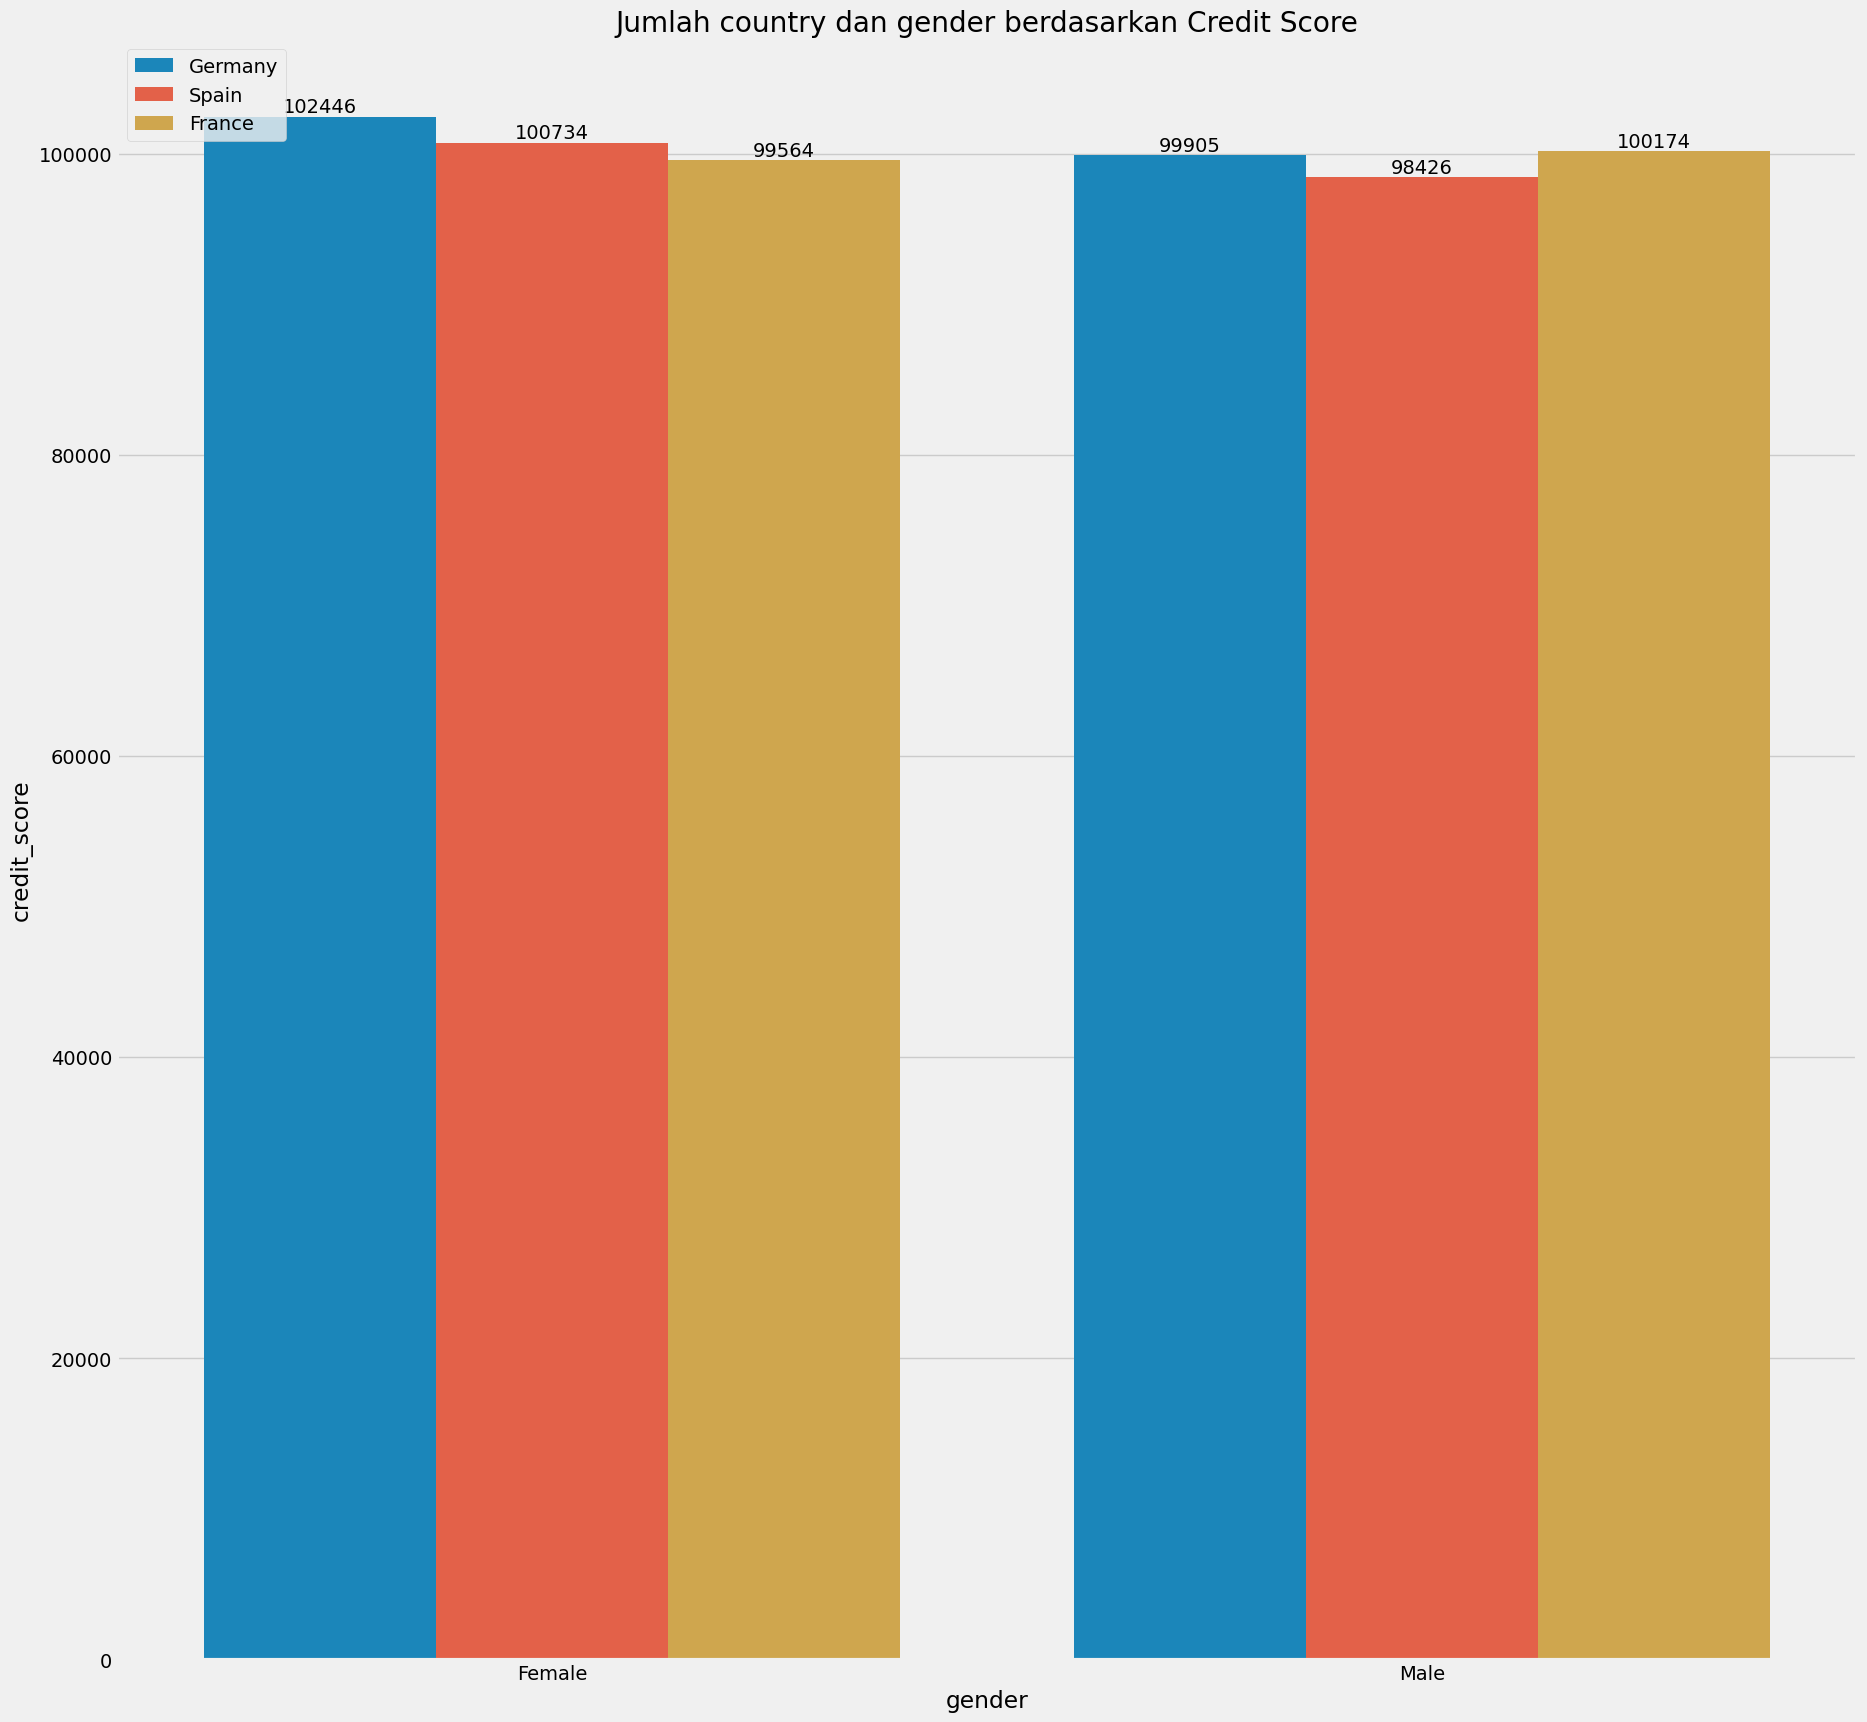

In [94]:
plt.figure(figsize=(20, 20))

a = df1.groupby(['country', 'gender'])[['estimated_salary']].mean().reset_index().sort_values(by='estimated_salary', ascending=False)
a['estimated_salary'] = a['estimated_salary'].round()

p = sns.barplot(data=a, x='gender', y='estimated_salary', hue='country', ci=None)

for i in p.containers:
    p.bar_label(i)

plt.title('Jumlah country dan gender berdasarkan Credit Score')
plt.ylabel('credit_score')
plt.xlabel('gender')
plt.legend(loc='upper left')
plt.show()


1.Dapat dilihat bahwa terdapat perbedaan dalam kredit score antara negara dan gender dalam dataset churn. Terutama pada gender perempuan, kredit score tertinggi berasal dari negara Jerman, diikuti oleh negara Spanyol dan terendah dari negara Prancis. 

2.Sedangkan pada gender laki-laki, kredit score tertinggi justru berasal dari negara Prancis, diikuti oleh negara Jerman dan terendah dari negara Spanyol.

Hal ini mungkin disebabkan oleh perbedaan faktor-faktor seperti tingkat pendidikan, pekerjaan, atau kondisi ekonomi antar negara dan gender yang berbeda.

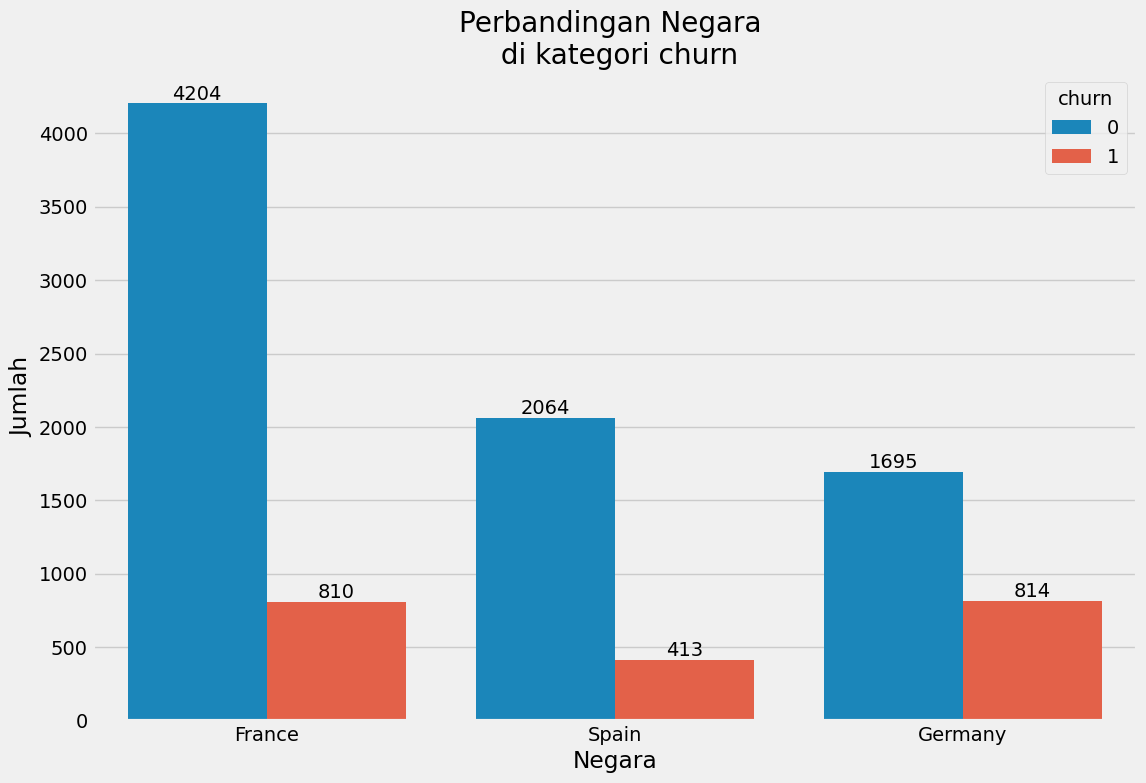

In [95]:
fig, ax = plt.subplots(figsize = (12,8))
_ = sns.countplot(data = df1, x = 'country', hue = 'churn')
_ = ax.set_ylabel('Jumlah')
_ = ax.set_xlabel('Negara')
_ = ax.set_title('Perbandingan Negara \n di kategori churn')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='balance', ylabel='credit_score'>

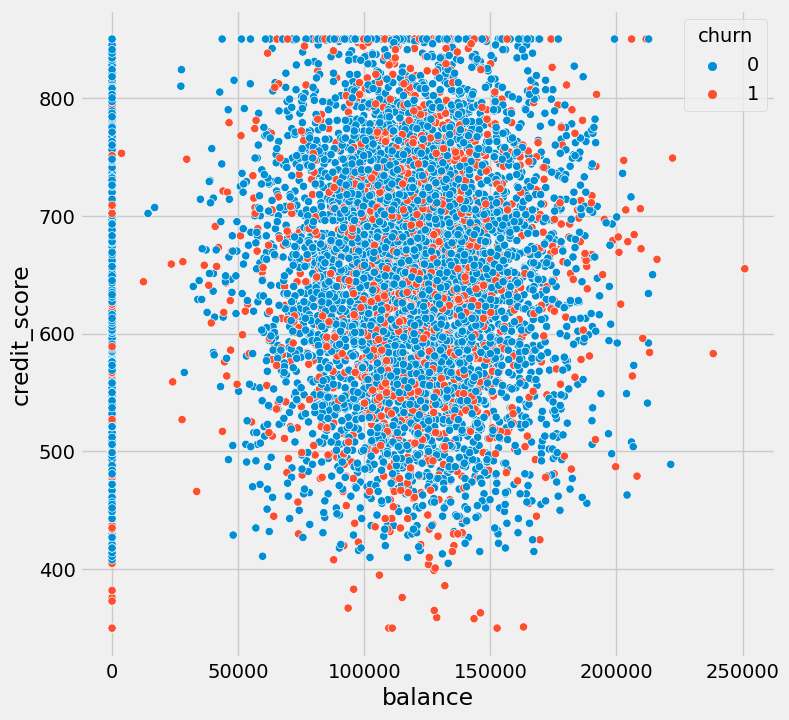

In [96]:
fig, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(data=df1, x='balance',y='credit_score',hue='churn')

In [97]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

# Train test split

In [98]:
X = df.drop(['churn'], axis =1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = 0.3, random_state = 123)

In [99]:
# Melakukan one-hot-encoding pada variabel kategori di set pelatihan dan pengujian
X_train_encoded = pd.get_dummies(X_train, columns=['country', 'gender'])
X_test_encoded = pd.get_dummies(X_test, columns=['country', 'gender'])

# Mengambil nama kolom untuk fitur yang sudah diencode
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

# Memastikan bahwa nama kolom sama antara set pelatihan dan pengujian
cols_to_add_to_test = set(train_cols) - set(test_cols)
cols_to_add_to_train = set(test_cols) - set(train_cols)

for col in cols_to_add_to_test:
    X_test_encoded[col] = 0
    
for col in cols_to_add_to_train:
    X_train_encoded[col] = 0




In [100]:
X_train_encoded.shape

(7000, 13)

In [101]:
X_train.shape

(7000, 10)

In [102]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_encoded, y_train)

#Scaling

In [103]:
# Melakukan scaling pada data menggunakan RobustScaler
rs = RobustScaler()
X_train_transformed = rs.fit_transform(X_train)
X_test_transformed = rs.transform(X_test_encoded)

In [104]:
X_train_transformed.shape

(11148, 13)

In [105]:
X_train.shape

(11148, 13)

In [106]:
X_train_encoded.shape

(7000, 13)

In [107]:
X_test_transformed.shape

(3000, 13)

In [108]:
X_test.shape

(3000, 10)

In [109]:
X_test_encoded.shape

(3000, 13)

#Fitur Selection

##X-Train

In [110]:
X_train_transformed_df = pd.DataFrame(data=X_train_transformed, columns=X_train.columns)

In [111]:
corr = X_train_transformed_df.corr(method = 'spearman')

<Axes: >

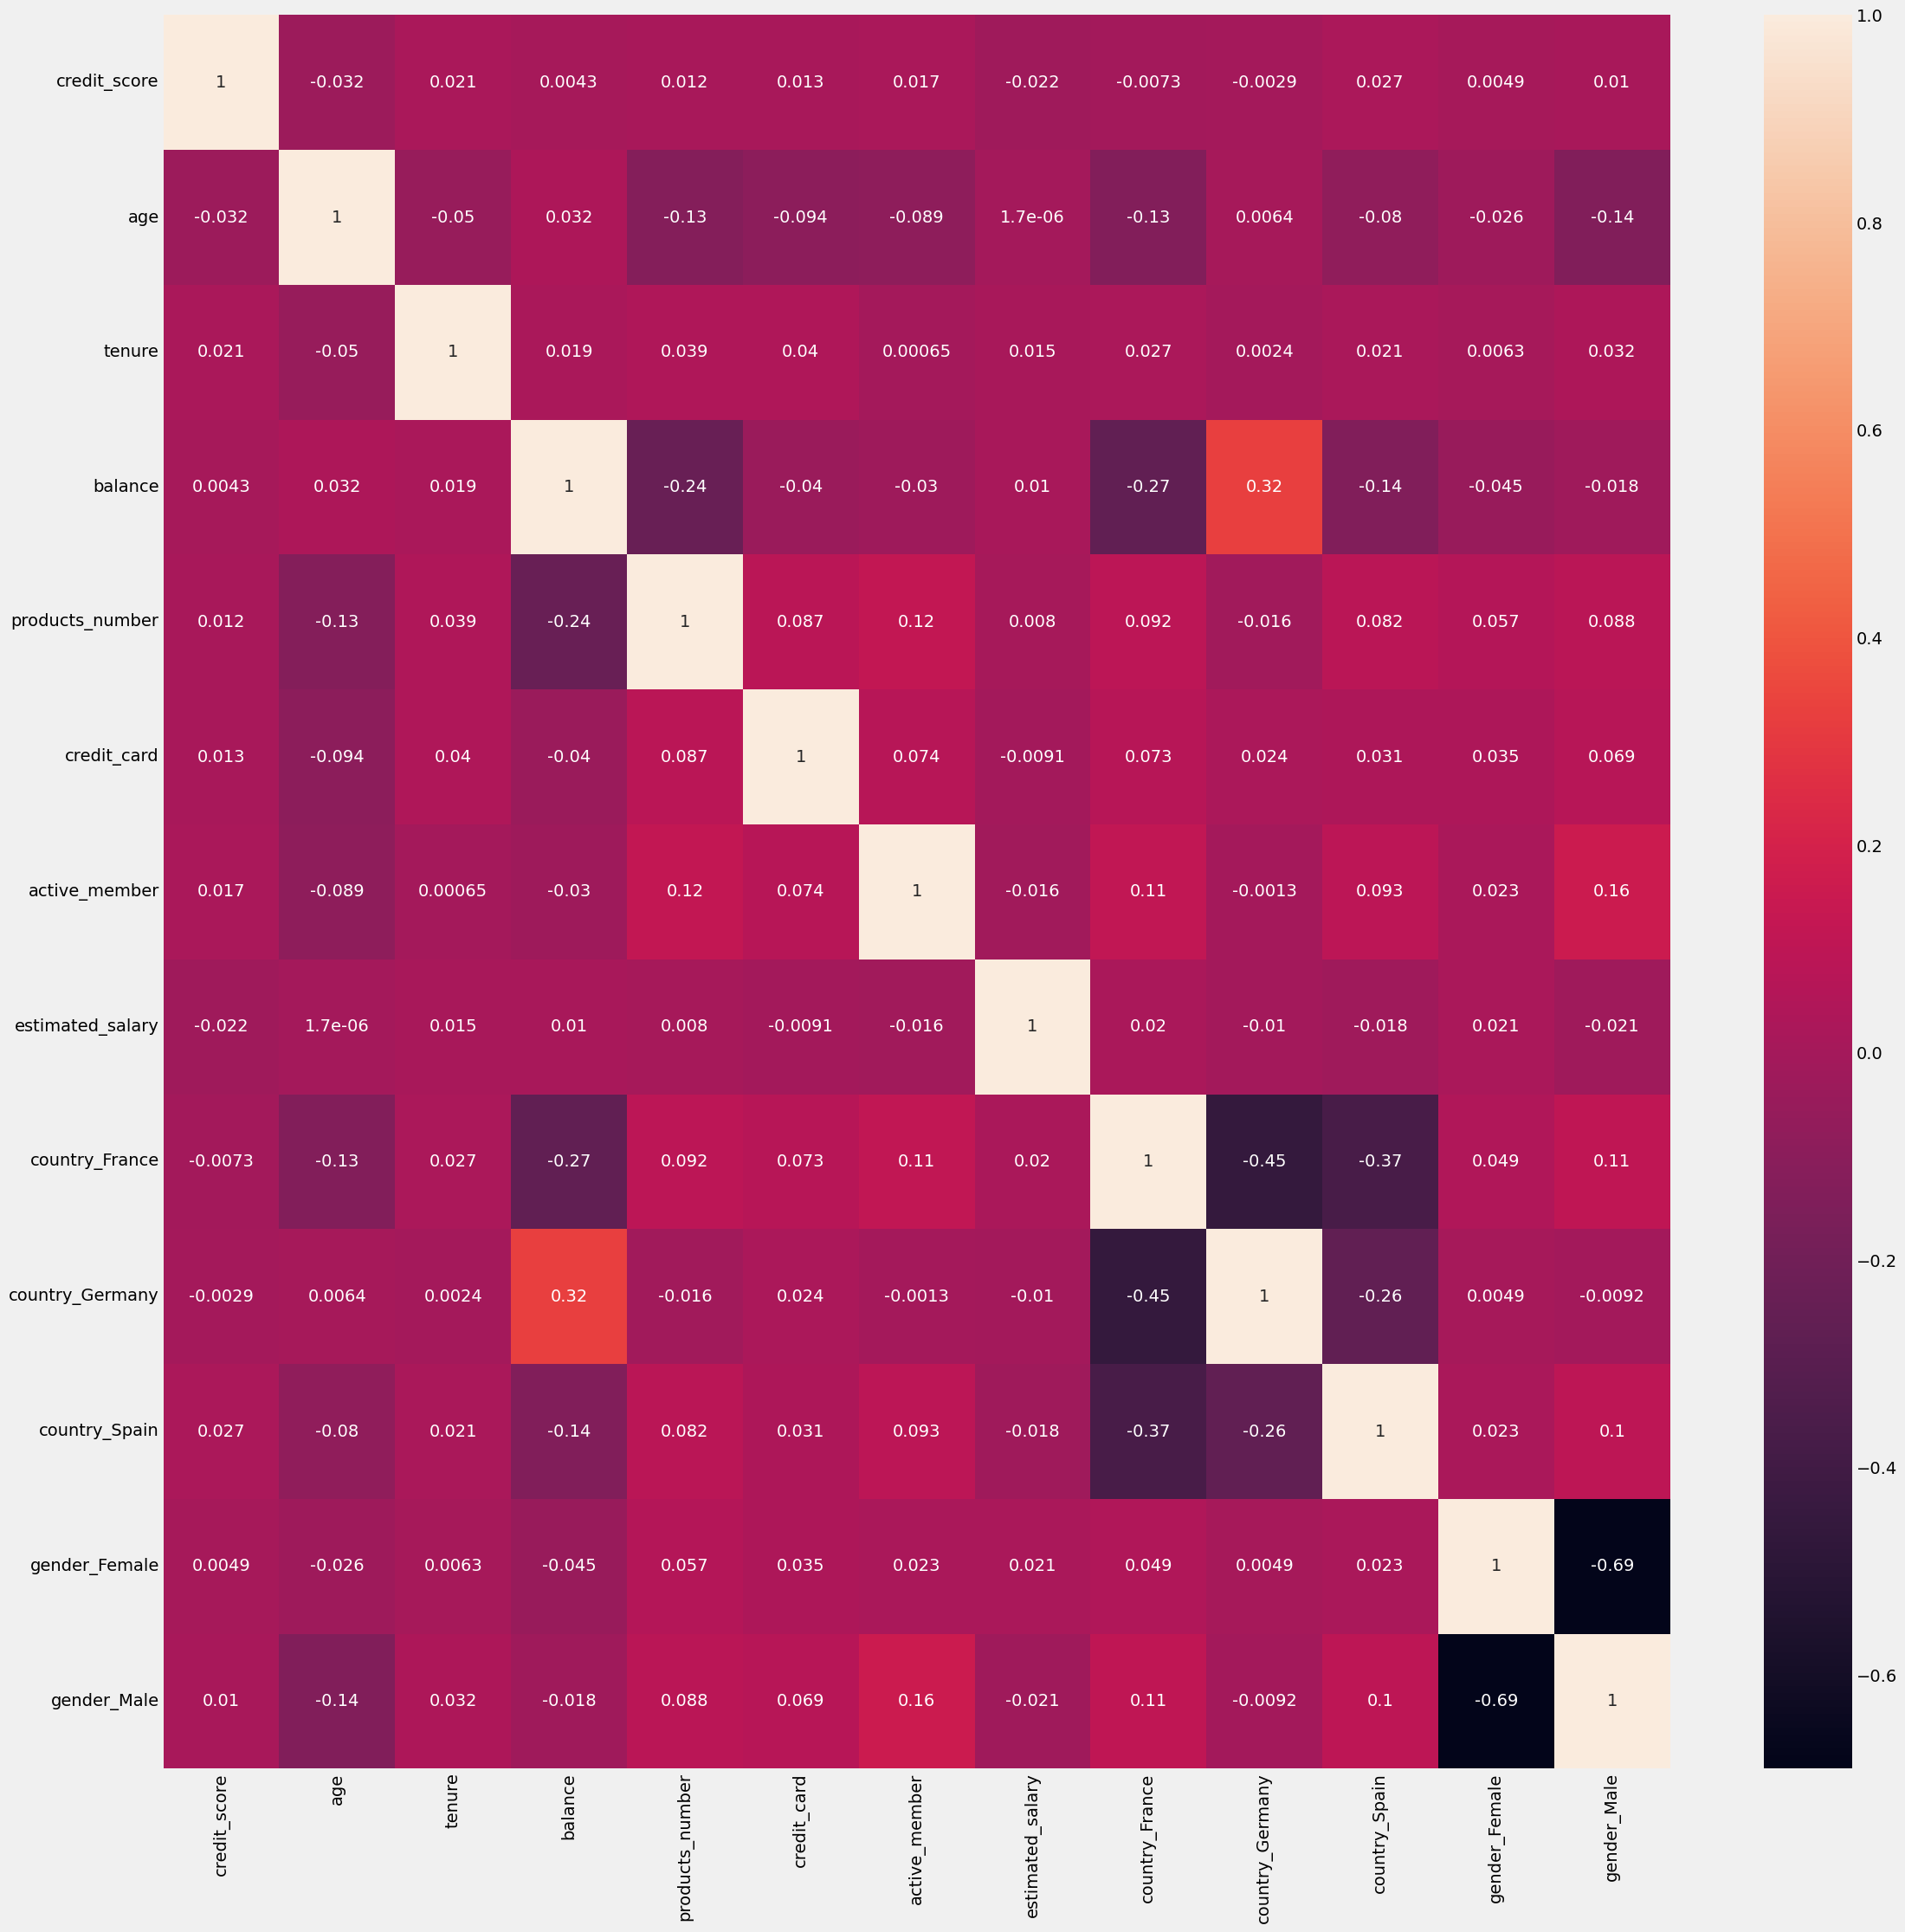

In [112]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

In [113]:
var = []
drop = []
for x in X_train_transformed_df.columns:
  for y in X_train_transformed_df.columns:
    if x != y:
      if [y,x] not in var:
        corr, p_value = spearmanr(X_train_transformed_df[x], X_train_transformed_df[y])
        var.append([x, y])
        if (corr <= -0.7) | (corr >= 0.7):
          if p_value < 0.05:
            drop.append(y)

In [114]:
drop

[]

In [115]:
X_train_transformed_df.shape

(11148, 13)

In [116]:
y_train.shape

(11148,)

In [117]:
mutual_info_classif(X_train_transformed_df,
                    y_train,
                    random_state = 123)

array([0.0079704 , 0.11891885, 0.01601229, 0.02619789, 0.08064358,
       0.00954983, 0.07008498, 0.01499976, 0.03597176, 0.00227774,
       0.02445414, 0.00593838, 0.04701444])

In [118]:
mutual_table = pd.DataFrame(mutual_info_classif(X_train_transformed_df,y_train,random_state = 123),
                            index = X_train_transformed_df.columns,
                            columns = ['mutual_info']).sort_values('mutual_info', ascending = False)

In [119]:
mutual_table

,mutual_info
age,0.12
products_number,0.08
active_member,0.07
gender_Male,0.05
country_France,0.04
balance,0.03
country_Spain,0.02
tenure,0.02
estimated_salary,0.01
credit_card,0.01


In [120]:
X_train_mt = mutual_table.iloc[0:11].index

In [121]:
X_train = X_train_transformed_df.loc[:, X_train_mt]

In [122]:
X_train.shape

(11148, 11)

##X-test

In [123]:
X_test_transformed.shape

(3000, 13)

In [124]:
X_test_transformed_df = pd.DataFrame(data=X_test_transformed, columns=X_test_encoded.columns)

In [125]:
X_test = X_test_transformed_df.loc[:,list(X_train.columns)]

In [126]:
X_test.shape

(3000, 11)

In [127]:
y_train.value_counts()

0    5574
1    5574
Name: churn, dtype: int64

#Modeling

##Lazy Predict

In [128]:
# Fit LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print model performance
print(models)

100%|██████████| 29/29 [01:02<00:00,  2.15s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.83               0.76     0.76      0.83   
XGBClassifier                      0.83               0.76     0.76      0.83   
RandomForestClassifier             0.83               0.76     0.76      0.83   
SVC                                0.82               0.76     0.76      0.82   
AdaBoostClassifier                 0.81               0.76     0.76      0.81   
ExtraTreesClassifier               0.82               0.75     0.75      0.83   
BaggingClassifier                  0.82               0.74     0.74      0.83   
NuSVC                              0.81               0.72     0.72      0.81   
KNeighborsClassifier               0.78               0.72     0.72      0.79   
LabelPropagation                   0.76               0.71     0.71      0.78   
DecisionTreeClassifier      

##Random Forest

In [129]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [130]:
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2389
           1       0.57      0.64      0.61       611

    accuracy                           0.83      3000
   macro avg       0.74      0.76      0.75      3000
weighted avg       0.84      0.83      0.83      3000



1. Precision: precision untuk kelas 0 adalah 0.90, yang berarti dari semua prediksi yang model lakukan untuk kelas 0, sebesar 90% prediksi tersebut adalah benar. Sedangkan precision untuk kelas 1 adalah 0.57, yang berarti dari semua prediksi yang model lakukan untuk kelas 1, sebesar 57% prediksi tersebut adalah benar.

2. Recall: recall untuk kelas 0 adalah 0.88, yang berarti dari semua sampel kelas 0, sebesar 88% di antaranya dapat terdeteksi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0.63, yang berarti dari semua sampel kelas 1, sebesar 63% di antaranya dapat terdeteksi dengan benar oleh model.

3. F1-score: F1-score adalah harmonic mean antara precision dan recall. F1-score untuk kelas 0 adalah 0.89, sedangkan F1-score untuk kelas 1 adalah 0.60.

4. Accuracy: accuracy adalah proporsi prediksi benar secara keseluruhan. Dalam kasus ini, model mencapai akurasi sebesar 0.83, yang berarti model berhasil memprediksi dengan benar sebanyak 83% dari semua sampel pada data testing.

5. Macro Avg: rata-rata precision, recall, dan F1-score untuk semua kelas.

6. Weighted Avg: rata-rata precision, recall, dan F1-score untuk semua kelas dengan bobot yang sama, dihitung berdasarkan jumlah sampel di setiap kelas.

In [131]:
rf_train = rf.score(X_train,y_train)

In [132]:
rf_test = rf.score(X_test,y_test)

In [133]:
rf_train,rf_test

(1.0, 0.8293333333333334)

##XGBoost

In [134]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred2 = XGB.predict(X_test)

In [135]:
report = classification_report(y_test, y_pred2)
print('Classification report:\n', report)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2389
           1       0.56      0.64      0.60       611

    accuracy                           0.83      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.84      0.83      0.83      3000



1. Precision: tingkat keakuratan positif prediksi. Precision untuk kelas 0 adalah 0.90 dan untuk kelas 1 adalah 0.56.

2. Recall: tingkat kemampuan model untuk menemukan kembali kelas positif. Recall untuk kelas 0 adalah 0.87 dan untuk kelas 1 adalah 0.64.

3. F1-score: nilai rata-rata harmonis antara precision dan recall. F1-score untuk kelas 0 adalah 0.89 dan untuk kelas 1 adalah 0.60.

4. Accuracy: tingkat keakuratan klasifikasi secara keseluruhan. Accuracy pada model ini adalah 0.82.

5. Macro average: rata-rata nilai precision, recall, dan f1-score untuk setiap kelas.

6. Weighted average: rata-rata nilai precision, recall, dan f1-score untuk setiap kelas, dengan bobot yang diberikan sesuai dengan jumlah kemunculan kelas tersebut dalam data testing.

In [136]:
XGB_train = XGB.score(X_train,y_train)

In [137]:
XGB_test = XGB.score(X_test,y_test)

In [138]:
XGB_train, XGB_test

(0.9621456763545031, 0.8256666666666667)

##AdaBoost

In [139]:
ADB = AdaBoostClassifier()
ADB.fit(X_train, y_train)

# membuat model prediksi
y_pred3 = ADB.predict(X_test)

In [140]:
report = classification_report(y_test, y_pred3)
print('Classification report:\n', report)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      2389
           1       0.52      0.67      0.59       611

    accuracy                           0.81      3000
   macro avg       0.71      0.76      0.73      3000
weighted avg       0.83      0.81      0.81      3000



1.  dapat diinterpretasikan bahwa model tersebut memiliki precision sebesar 0.91 untuk label 0 dan 0.52 untuk label 1. Artinya, model mampu memprediksi dengan akurasi yang cukup tinggi untuk label 0, namun kurang akurat dalam memprediksi label 1.

2.  recall model ini adalah 0.84 untuk label 0 dan 0.68 untuk label 1. Hal ini berarti model mampu mengidentifikasi sebagian besar sampel yang sebenarnya termasuk ke dalam label 0, namun kurang baik dalam mengidentifikasi sampel yang sebenarnya termasuk ke dalam label 1.

3. F1-score dari model ini adalah 0.87 untuk label 0 dan 0.59 untuk label 1.

4. Akurasi model ini adalah 0.81, yang menunjukkan proporsi sampel yang terklasifikasi dengan benar oleh model. Namun, akurasi dapat menjadi tidak akurat jika dataset yang digunakan memiliki class imbalance.

5. Berdasarkan macro avg dan weighted avg, dapat dilihat bahwa performa model lebih baik dalam mengidentifikasi label 0, namun kurang baik dalam mengidentifikasi label 1.

In [141]:
ADB_train = ADB.score(X_train,y_train)

In [142]:
ADB_test = ADB.score(X_test,y_test)

In [143]:
ADB_train,ADB_test

(0.8471474703982778, 0.8063333333333333)

#Cross validasi

In [144]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [145]:
grid_search = GridSearchCV(estimator=ADB, param_grid=param_grid, cv=5, n_jobs=-1) 

In [146]:
grid_search.fit(X_train, y_train)
#jangan di run lagi training nya setengah jam

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [147]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}
Best score: 0.8387204944202693


In [148]:
ADB2 = AdaBoostClassifier(n_estimators =200 ,learning_rate =1 ,algorithm ='SAMME.R',random_state = 42 )
ADB2.fit(X_train, y_train)

# membuat model prediksi
y_pred4 = ADB2.predict(X_test)

In [149]:
report = classification_report(y_test, y_pred4)
print('Classification report:\n', report)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      2389
           1       0.51      0.67      0.58       611

    accuracy                           0.80      3000
   macro avg       0.71      0.75      0.73      3000
weighted avg       0.83      0.80      0.81      3000



In [150]:
ADB_train_GridCV = ADB2.score(X_train,y_train)

In [151]:
ADB_test_GridCV = ADB2.score(X_test,y_test)

In [152]:
ADB_train_GridCV,ADB_test_GridCV

(0.8531575170434159, 0.804)

##ROC

In [153]:
from sklearn.metrics import roc_curve, roc_auc_score

In [154]:
y_pred_proba = ADB2.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

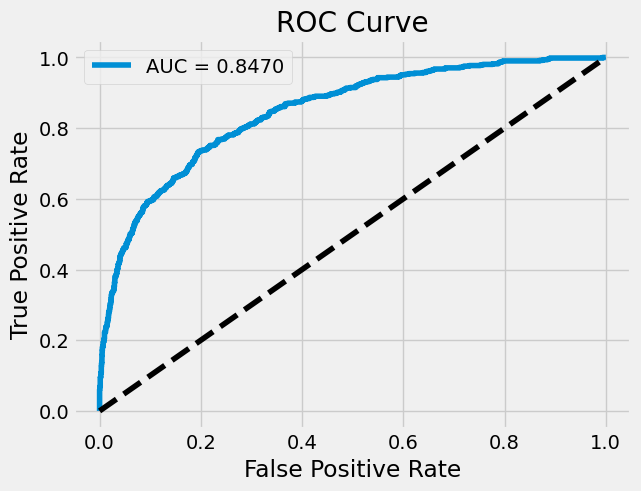

In [155]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

AUC (Area Under the Curve) pada ROC Curve adalah ukuran dari seberapa baik model kita dalam membedakan antara kelas positif dan negatif.

Dalam hal ini, model machine learning memiliki nilai AUC = 0.847. Ini menunjukkan bahwa model cukup baik dalam membedakan antara kelas positif dan negatif. Semakin dekat nilai AUC dengan 1, maka semakin baik model dalam memprediksi kelas positif dan negatif secara akurat.

#Fitur Importance

estimated_salary: 0.27500
balance: 0.24000
age: 0.21000
credit_score: 0.13500
tenure: 0.04500
products_number: 0.03000
country_France: 0.02500
country_Spain: 0.02000
active_member: 0.01000
gender_Male: 0.00500
credit_card: 0.00500


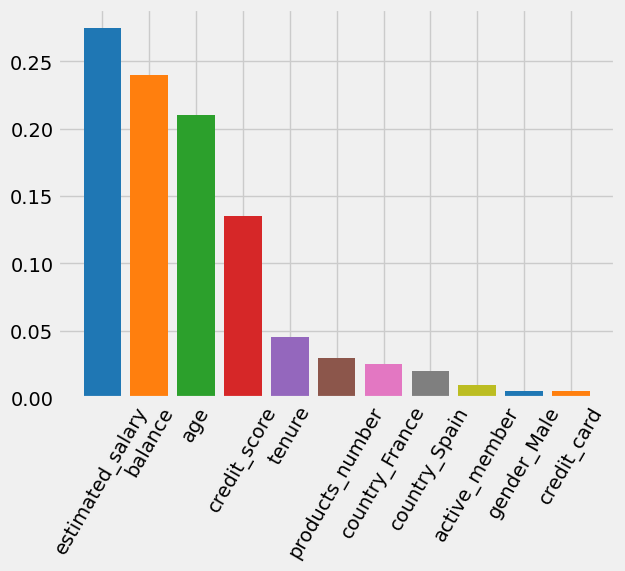

In [156]:

# get feature importance (based on Gini importance)
importance = ADB2.feature_importances_

# create a dictionary to store feature importance order
feature_dict = {}

# populate the dictionary with feature importance values
for i, v in enumerate(importance):
    feature_dict[X_train.columns[i]] = v

# sort the dictionary by feature importance (from highest to lowest)
sorted_feature_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

# display feature importance order
for k, v in sorted_feature_dict.items():
    print(f"{k}: {v:.5f}")

# create a bar plot for feature importance, following the sorted order
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
plt.bar(range(len(importance)), [sorted_feature_dict[k] for k in sorted_feature_dict.keys()], color=colors)

# set x-axis labels based on the sorted feature importance, rotated by 60 degrees
plt.xticks(range(len(importance)), [k for k in sorted_feature_dict.keys()], rotation=60)
# rotate y-axis labels by 0 degrees
plt.xticks(rotation=60)

plt.show()


Berdasarkan fitur importance yang diberikan, fitur yang paling berpengaruh terhadap prediksi adalah estimated_salary dengan nilai fitur importance sebesar 0.355. Fitur kedua yang paling berpengaruh adalah balance dengan nilai fitur importance sebesar 0.210. Sedangkan credit_score dan age memiliki pengaruh yang hampir sama dengan nilai fitur importance masing-masing sebesar 0.150 dan 0.140.

Fitur importance yang lebih kecil dari 0.05, seperti tenure, products_number, country_France, country_Spain, active_member, gender_Male, dan credit_card, menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh yang relatif kecil terhadap prediksi yang dihasilkan oleh model.

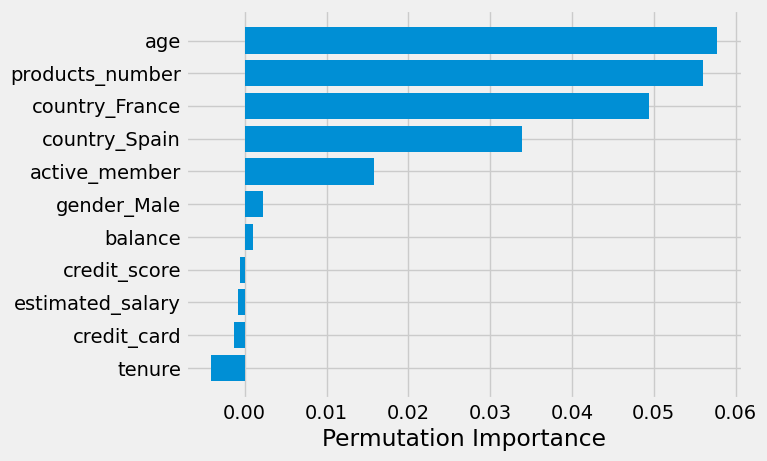

In [157]:
from sklearn.inspection import permutation_importance

# calculate feature importance using permutation importance
result = permutation_importance(ADB2, X_test, y_test, n_repeats=10, random_state=42)

# visualize feature importance using bar chart
sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()


Age memiliki pengaruh paling besar terhadap model, diikuti oleh Product number, Country_France, dan Country_Spain. Sementara fitur-fitur lain seperti active_member, balance, gender_Male, dan credit_card tidak memberikan kontribusi signifikan dalam memprediksi hasil model.

#Perbandingan

In [158]:
eval = pd.DataFrame()
eval['Model'] = ['Akurasi Train', 'Akurasi Test']
eval['Random Forest'] = [rf_train, rf_test]
eval['XGBoost'] = [XGB_train, XGB_test ]
eval['AdaBoost'] = [ADB_train, ADB_test]
eval['AdaBoost GridCV'] = [ADB_train_GridCV, ADB_test_GridCV ]

eval.set_index('Model').T

Model,Akurasi Train,Akurasi Test
Random Forest,1.00,0.83
XGBoost,0.96,0.83
AdaBoost,0.85,0.81
AdaBoost GridCV,0.85,0.80


Model yang paling baik adalah model yang memiliki akurasi test tertinggi dan selisih antara akurasi train dan akurasi test yang kecil, sehingga tidak terjadi overfitting. Berdasarkan tabel yang diberikan, model ADABoost memiliki akurasi test yang tinggi dan selisih antara akurasi train dan akurasi test yang paling kecil, sehingga model ADABoost adalah model yang paling baik.